# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

df = pd.read_csv('data/human_body_temperature.csv')

In [19]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


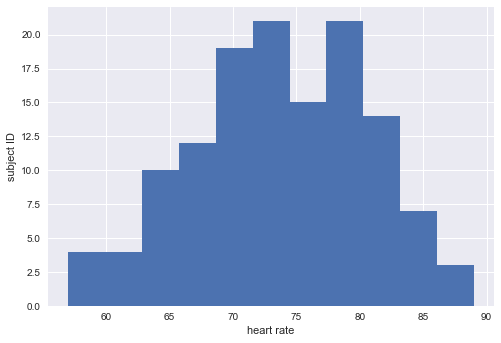

In [20]:
# Your work here.
#try a basic histogram of the heart rate data
sns.set()
_ = plt.hist(df['heart_rate'], bins=11)
#set bins at sqrt of number of datapoints
_ = plt.xlabel('heart rate')
_ = plt.ylabel('Frequency')
plt.show()

In [4]:
#get some descriptive stats on the dataset
size=df.temperature.size
size

130

In [5]:
mean=df.temperature.mean()
mean

98.24923076923078

In [6]:
median=df.temperature.median()
median

98.3

In [7]:
std=df.temperature.std()
std

0.7331831580389454

### Question 1
#### Is the distribution of body temperatures normal?
##### Although this is not a requirement for CLT to hold (read CLT carefully),it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

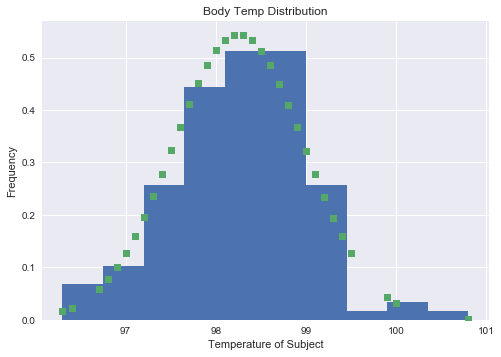

In [30]:
#see how a normal curve with the same parameters matches up to our data

sns.set()
_ = plt.hist(df.temperature, normed=True)
normal_dist=stats.norm.pdf(df.temperature, mean, std)
plt.plot(df.temperature, normal_dist, 's')
_ = plt.xlabel('Temperature of Subject')
_ = plt.ylabel('Frequency')
_ = plt.title('Body Temp Distribution')
plt.show()

# the distribution does seem to be similar to a normal distribution, thus it can be 
# understood that our data is normally distributed.

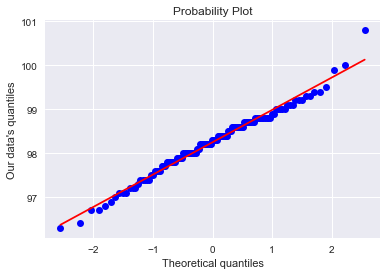

In [36]:
#Another option for testing normality according to https://en.wikipedia.org/wiki/Normality_test
#is the quantile quantile plot. If our points fall on a straight line, our distribution is most
#likely normal.

#According to this test, the data is normally distributed.

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.ylabel("Our data's quantiles")
pylab.show()



### Question 2
#### Is the sample size large? Are the observations independent?
##### Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.



#### Answer: 
<p> Yes the sample size is 130 which is greater than the required n = 30 for the Central Limit Theorem. The observations are independent because they come from individual test subjects that participated in the study.</p>

### Question 3
#### Is the true population mean really 98.6 degrees F?
##### Would you use a one-sample or two-sample test? Why?
##### In this situation, is it appropriate to use the $t$ or $z$ statistic?
##### Now try using the other test. How is the result be different? Why?


<p>sources: http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests%3A-1-sample%2C-2-sample%2C-and-paired-t-tests
https://www.linkedin.com/pulse/z-test-vs-t-test-arunmozhi-ilango
http://www.statisticshowto.com/z-test/</p>

<p> The above were used to answer Question 3</p>

<p> A one-sample test works fine for this question because we are comparing the samples to the population mean (98.6 degrees)</p>

<p> It is more appropriate to use the z test here because our n is greater than or equal to 30. Usually the t test is used
when our n is less than 30. Additionally, we know our standard deviation so we can use a Z test.
</p>

In [8]:
#z-value calculation
signal=mean-98.6
noise=std/(size**0.5)
z_val=signal/noise
z_val

#meaning the mean of 98.25 is 5 times lower than the assumed temperature of 98.6 F.

-5.454823292364079

In [10]:
P_value=stats.norm.sf(abs(z_val))*2
P_value

# P_value is less than 0.05 so the true population mean is not 98.6 F (null hypothesis is rejected)

4.9021570141133797e-08

### Critical Values

In [12]:
#Find critical t-value, 2 tail
critical_t=stats.t.ppf(1-0.025, 129)
critical_t

1.9785244914586051

In [13]:
margin_error_t = critical_t*std/np.sqrt(130)
margin_error_t

0.12722786362273045

In [14]:
#Find critical z-value, 1 tail (the scores will be the same because n is above 30 in both cases)
critical_z=stats.norm.ppf(0.975)
critical_z

1.959963984540054

In [15]:
margin_error_z = std*critical_z/np.sqrt(130)
margin_error_z 

0.1260343410491174

### True mean ranges

In [ ]:
#T-stat (dof is 129)

In [16]:
mean_t1=mean+margin_error_t
mean_t2=mean-margin_error_t

In [ ]:
#Z-stat

In [17]:
mean_z1=mean+margin_error_z
mean_z2=mean-margin_error_z

In [24]:
#Both are 95% confidence intervals
print("T stat with 95% CI:", mean_t2, "F to ", mean_t1," F. \n"
      "Z stat with 95% CI:", mean_z2, "F to ", mean_z1," F.\n"
      "The ranges are so similar because n>30. Z-stat and T-stat will have the same results.")

T stat with 95% CI: 98.1220029056 F to  98.3764586329  F. 
Z stat with 95% CI: 98.1231964282 F to  98.3752651103  F.
The ranges are so similar because n>30. Z-stat and T-stat will have the same results.


### Question 4
##### Draw a small sample of size 10 from the data and repeat both tests.
##### Which one is the correct one to use?
##### What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [50]:
temp = df.temperature
sample_set = np.random.choice(temp, size=10)
sample_set


array([ 98.7,  96.7,  98.3,  98.1,  98.6,  98.2,  98.6,  98.6,  97.4,  97.2])

In [52]:
#try t-test
t_sample = (np.mean(sample_set) - 98.6) / (np.std(sample_set) / np.sqrt(len(sample_set)))

print('t =', t_sample)

p_val_sample_t = stats.t.sf(np.abs(t_sample), len(sample_set)-1)*2
print('p = ', p_val_sample_t)

t = -2.67456251965
p =  0.0254316225745


In [53]:
#try z-test
z_sample = (np.mean(sample_set) - 98.6) / (np.std(sample_set) / np.sqrt(len(sample_set)))

print('z =', z_sample)

p_val_sample_z = stats.norm.sf(np.abs(z_sample))*2
print('p = ', p_val_sample_z)

z = -2.67456251965
p =  0.00748268229291


<p>The above shows us that we should not be using the z-stat for this exercise. Because our n is smaller than 30, 
it is necessary to use the t-stat. There is a large difference in value with our p-values because of the difference 
in calculation. </p> 

### Question 5
##### At what temperature should we consider someone's temperature to be "abnormal"?
##### Start by computing the margin of error and confidence interval.

In [37]:
margin_error_z =1.96 * std/ np.sqrt(130)

In [38]:
conf_int = mean + np.array([-1, 1]) * margin_error_z
conf_int

array([ 98.12319411,  98.37526743])

<p>Normal temp range is between 98.12 adn 98.38. 98.6 is outside of this range.</p>

### Question 6
##### Is there a significant difference between males and females in normal temperature?
##### What test did you use and why?
##### Write a story with your conclusion in the context of the original problem.

In [ ]:
#Ho: mean temperature of male is equal to mean temperature of females. 
#H1: mean temperature of male is NOT equal to mean temperature of females.

In [31]:
males=df[df.gender=='M']
females=df[df.gender=='F']

In [36]:
#descriptive stats for each
median_m_temp = males.temperature.median()
mean_m_temp = males.temperature.mean()
std_m_temp = males.temperature.std()

median_f_temp = females.temperature.median()
mean_f_temp = females.temperature.mean()
std_f_temp = females.temperature.std()

In [41]:
#Differences in the means
diff_mean = abs(mean_m_temp - mean_f_temp)
diff_mean

0.289230769230727

In [42]:
#use z test because we have more than 30 observations
z = diff_mean / np.sqrt(((std_m_temp ** 2)/ 65) + ((std_f_temp ** 2)/ 65))
z

2.2854345381652741

In [47]:
pval = stats.t.sf(np.abs(z), 128)*2
pval

0.023931883122415926

<p>Because the p-value is less than 0.05, the null hypothesis is rejected. Thus the different in mean temperatures of 
men and women is statistically significant </p>

<p> For more than 120 years, it has been understood that the average temperature of the human body is 
98.6 degrees Fahrenheit. However, the above statistical tests have shown that this value is actually outside 
of the range of average. The true range of normal human body temperature is between 98.12 adn 98.38 degrees 
Fahrenheit. </p>